# Script to analyze the gene expression over different bins
### Genome Analysis Project, VT24

**Last Changed:** 2024-04-29

## 1) Read the data

Open the data files (.tsv) and store them as pandas dataframes

In [1]:
# Import the necessary packages
import os
import pandas as pd

In [7]:
# Define the path to the directory containing the data files (.tsv format)
directory = '/Users/claranordquist/Documents/Universitetet/VT/Genome_Analysis/Lab_Project/Feature_analysis/'

# Create a dictionary where all the dataframes will be stored for each bin
# Create another dictionary where the data is pooled so that there is just one dataset for the high (SRR4342137) and one for the low oxygen (SRR4342139) environment
bin_dataframes = {}
env_dataframes = {'High':pd.DataFrame(), 'Low':pd.DataFrame()}

# Loop over the files in the input directory and pick those that end with .tsv
# For those, read the files and make them into dataframes
for file in os.listdir(directory):
    if file.endswith('.tsv'):
        basename = file[:-4]
        bin_dataframes[basename] = pd.read_table(os.path.join(directory, file), sep='\t', skiprows=1, header=None)
        bin_dataframes[basename].columns = ["Count", "Gene_ID", "ftype", "length_bp", "gene", "EC_number", "COG", "Product"]
        bin_dataframes[basename].insert(0, 'Bin', basename)

        # if basename.endswith('SRR4342137'):
        #     env_dataframes['High'] = pd.concat([env_dataframes['High'], bin_dataframes[basename]], axis=0, ignore_index=True)
        # else:
        #     env_dataframes['Low'] = pd.concat([env_dataframes['Low'], bin_dataframes[basename]], axis=0, ignore_index=True)

In [ ]:
# This can be used to merge rows that are from the same feature, if multiple bins would show the same feature 
# Don't know if this is necessary though?
aggregate_function = {"Count":'sum', "Gene_ID":'first', "ftype":'first', "length_bp":'first', "gene":'first', "EC_number":'first', "COG":'first', "Product":'first'}

for env, data in env_dataframes.items():
    data = data.groupby(data['Gene_ID']).aggregate(aggregate_function)

In [29]:
for keys, values in bin_dataframes.items():
    print(keys, len(values))

Bin_15_SRR4342137 125
Bin_20_SRR4342139 145
Bin_19_SRR4342137 415
Bin_4_SRR4342137 407
Bin_19_SRR4342139 902
Bin_4_SRR4342139 136
Bin_20_SRR4342137 160
Bin_15_SRR4342139 450


## 2) Heatmap for the gene expression in different bins

In [34]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Pool the data into one dataframe with three columns
# Drop the rows with NaN values (= genes without names)
# Bin (4_low, 4_high, 15_low, 15_high, ...)
# Gene (gene name)
# Count (N° RNA counts)
heatmap_dataframe = pd.concat([bin_dataframes[x][['Bin', 'Count', 'gene']] for x in bin_dataframes.keys()], axis=0, ignore_index=True)
heatmap_dataframe = heatmap_dataframe.dropna()

# Convert it to a pivot table telling how I want the heatmap
# Columns = Genes
# Rows = Bins
# Values = Count numbers
pivot_table = pd.pivot(data=heatmap_dataframe, columns='gene', index='Bin', values='Count')
pivot_table = pivot_table.fillna(0)

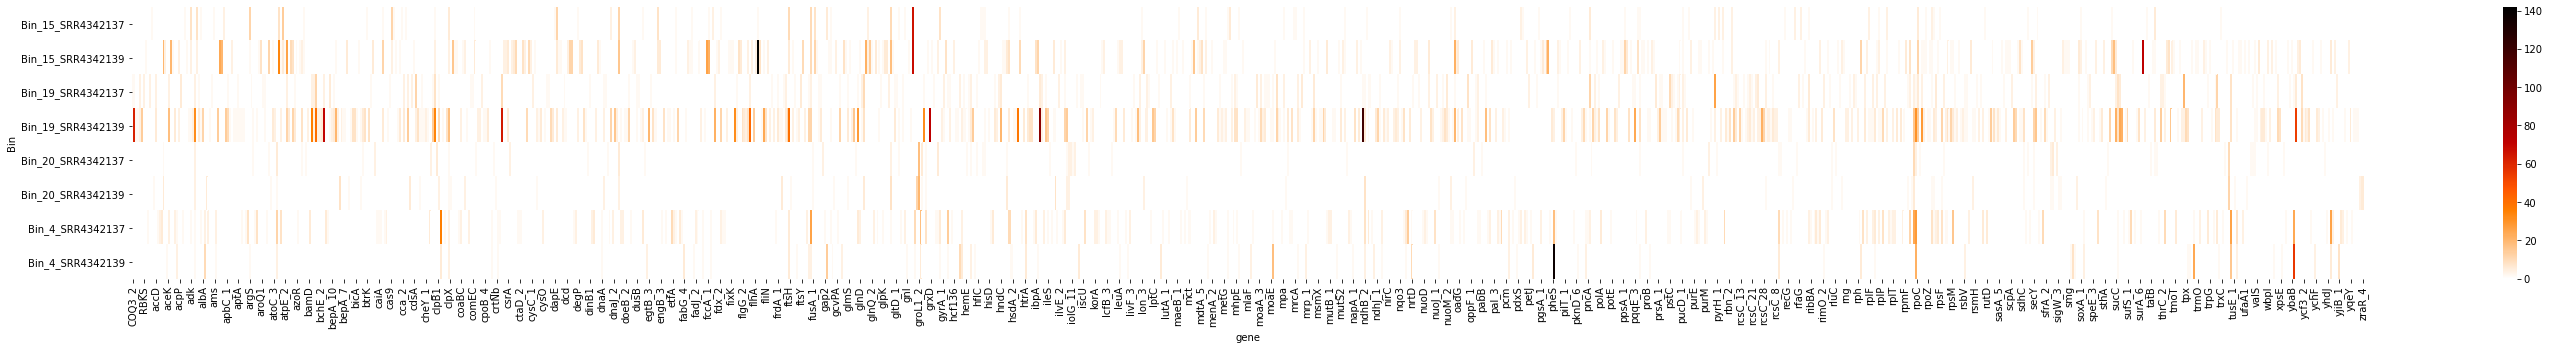

In [55]:
# Plot the heatmap
plt.figure(figsize = (50,5))
sns.heatmap(pivot_table, cmap='gist_heat_r', vmin=0)
plt.show()

## 3) What do I want to visualize?

Count = How many RNA reads were mapped to that feature

Gene_ID = The Prokka ID for the feature

ftype = CDS, coding sequence

length_bp = Length of the feature

Gene = Gene name

EC_number = Numerical classification for enzymes based on the chemical reactions they catalyze

COG = Cluster of orthologous genes

Product = Description of the gene product (when known)